In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Copenhagen_dfmguest.csv',
                   encoding='utf8')

In [4]:
df.head(2)

,Unnamed: 0,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,reviews_count,room_id,room_type
0,0,1.0,2.0,2.0,0.051848,1048,55.653094,12.615360,5,2.0,Amager East,5.0,155.0,0,17,7378,3747379,Entire home/apt
1,1,1.0,1.0,1.0,0.051848,1048,55.666940,12.598476,5,3.0,Amager East,5.0,93.0,0,10,7378,9225494,Entire home/apt


In [5]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.rename(columns ={'reviews_count':'review_count'},inplace=True)


In [6]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_id,room_type
0,1.0,2.0,2.0,0.051848,1048,55.653094,12.615360,5,2.0,Amager East,5.0,155.0,0,17,7378,3747379,Entire home/apt
1,1.0,1.0,1.0,0.051848,1048,55.666940,12.598476,5,3.0,Amager East,5.0,93.0,0,10,7378,9225494,Entire home/apt


In [7]:
df.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Copenhagen_IP.csv')

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet, LassoCV, Lasso

import patsy

In [9]:
df = df[df.price <= 1000]


In [10]:
df.shape

(14541, 17)

In [11]:
X = df[[x for x in df.columns if x not in ['bhk','price','latitude','longitude','room_id']]]
y = df.price.values
target = np.log(y)


In [12]:
formula = "target ~ "+' + '.join(X)+' -1'
formula

u'target ~ bathrooms + bedrooms + dist_arprt + host_count + metrostn_count + minstay + neighborhood + overall_satisfaction + rest_count + reviews + review_count + room_type -1'

In [13]:
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
y = y.values.ravel()

In [14]:
y

array([ 5.04342512,  4.53259949,  4.44265126, ...,  4.95582706,
        4.53259949,  4.58496748])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [16]:
X_train.shape, X_test.shape

((10178, 22), (4363, 22))

In [17]:
X_test.head(2)

,neighborhood[Amager East],neighborhood[Amager Vest],neighborhood[Bispebjerg],neighborhood[Bronshoj-Husum],neighborhood[Indre By],neighborhood[Norrebro],neighborhood[Osterbro],neighborhood[Valby],neighborhood[Vanlose],neighborhood[Vesterbro-Kongens Enghave],...,bathrooms,bedrooms,dist_arprt,host_count,metrostn_count,minstay,overall_satisfaction,rest_count,reviews,review_count
14178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,0.114117,2587.0,1.0,1.0,5.0,2.0,5.0,24146.0
4221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.089208,2340.0,3.0,3.0,2.0,1.0,0.0,28620.0


In [18]:
linmod = LinearRegression()

In [19]:
scores = cross_val_score(linmod, X_train, y_train, cv = 10)
print scores
print np.mean(scores)
print np.std(scores)

[ 0.55041075  0.54404541  0.5468411   0.51745545  0.54906067  0.47837836
  0.55171235  0.52840857  0.54474669  0.55087331]
0.536193266151
0.0219693360879


In [20]:
predictions = cross_val_predict(linmod, X_test, y_test, cv = 10) 
accuracy = metrics.r2_score(y_test, predictions)
print accuracy


0.521158180864


In [21]:
residuals = y_test - predictions
residuals

array([-0.40584567,  0.17161569, -0.85128459, ..., -0.06360427,
        0.02128743,  0.135903  ])

In [22]:
np.mean(predictions)


4.6150602031365029

In [23]:
linmod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
linmod.score(X_test, y_test)

0.52296574392575779

In [25]:
#linmod.coef_

In [26]:
print np.mean(y_train), np.mean(y_test)

4.61433148229 4.61476948286


In [27]:
# Regularization: Gridsearch an optimal ElasticNet regression

In [28]:
Xn = StandardScaler().fit_transform(X)

In [29]:
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.3)

In [30]:
# enet_cv = ElasticNetCV(l1_ratio=np.linspace(0.01, 1., 50), n_alphas=300, cv=10, verbose=1)
# enet_cv.fit(Xn_train, y_train)


In [31]:
# print enet_cv.l1_ratio_
# print enet_cv.alpha_

In [32]:
alpha = 0.000566946055587
l1_ratio = 1.0

enet_cop = ElasticNet(alpha= alpha, l1_ratio= l1_ratio)

y_pred_enet = enet_cop.fit(Xn_train, y_train).predict(Xn_test)
r2_score_enet = metrics.r2_score(y_test, y_pred_enet)
print(enet_cop)
print("r^2 on test data : %f" % r2_score_enet)


ElasticNet(alpha=0.000566946055587, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)
r^2 on test data : 0.539793


In [33]:
from sklearn.externals import joblib
#joblib.dump(enet_cop, '/Users/jyots/Desktop/DS_Projects/Models/enet_Copenhagen.pkl') 

In [34]:
lassocv = LassoCV(n_alphas=300, cv=10)

In [35]:
lassocv.fit(Xn_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=300, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [36]:
lassocv.alpha_

0.00050826326785172594

In [37]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso_model = lasso.fit(Xn_train, y_train)
y_pred_lasso = lasso_model.predict(Xn_test)
r2_score_lasso = metrics.r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.00050826326785172594, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.539797


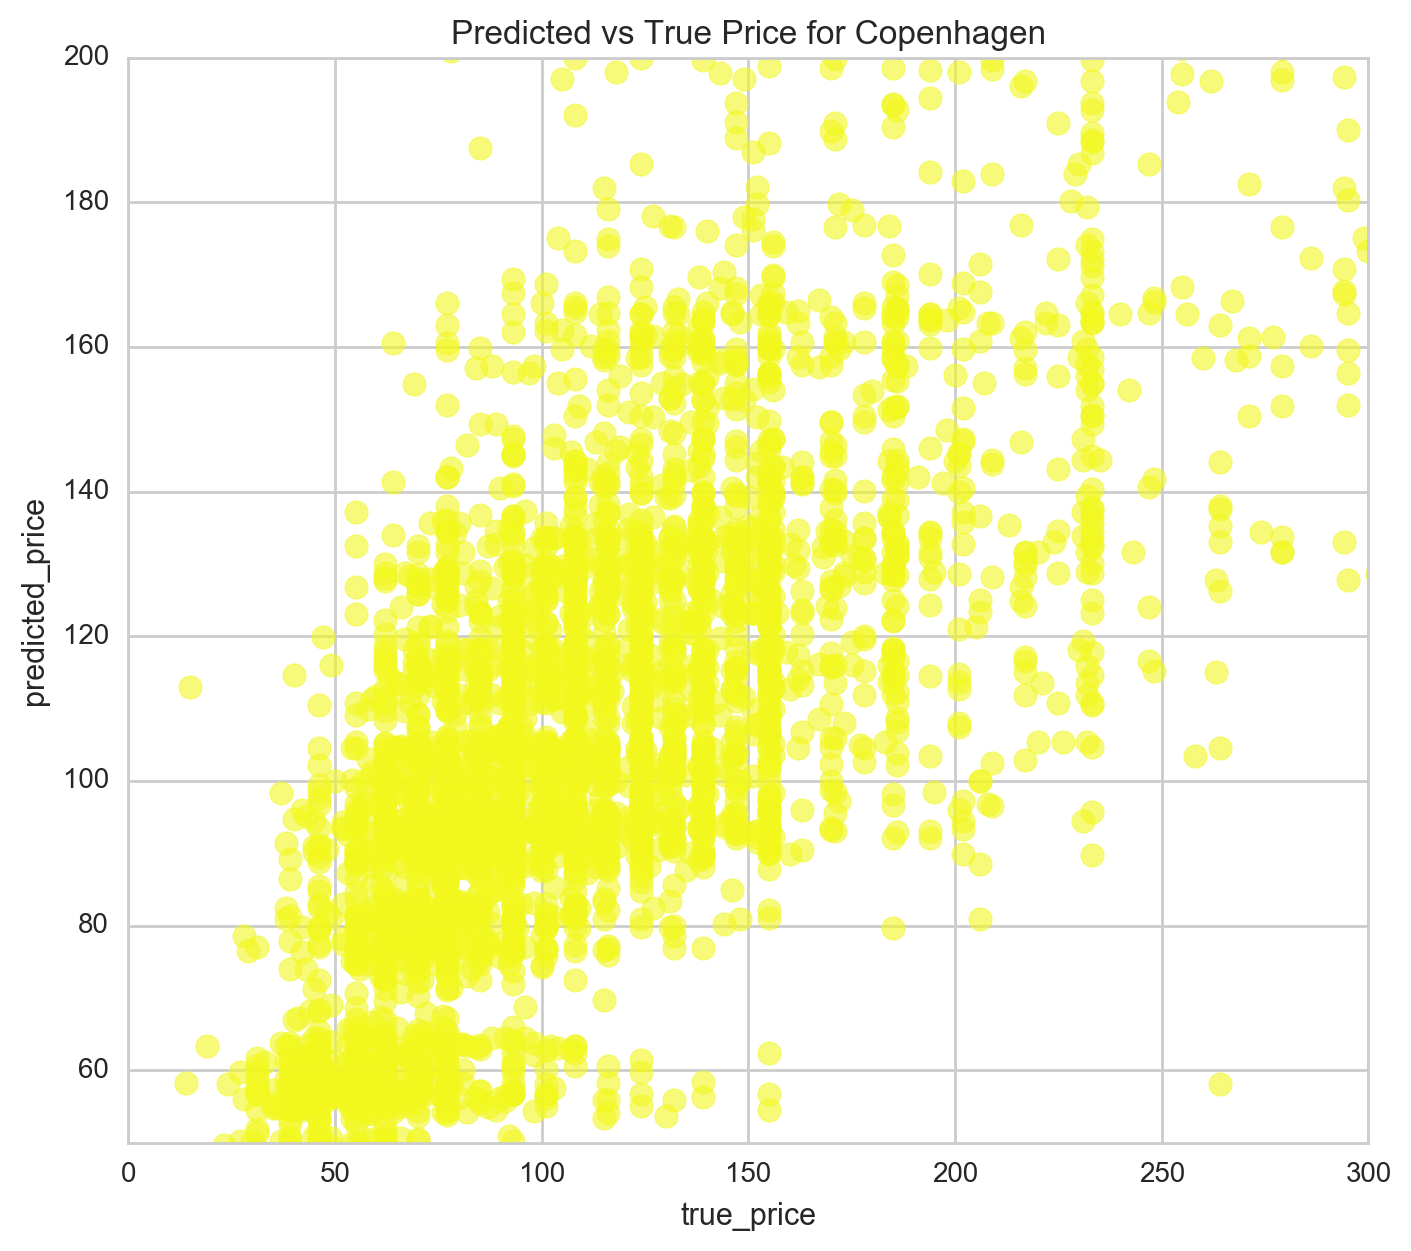

In [38]:
fig, ax = plt.subplots(figsize=(8,7))

ax.scatter(np.exp(y_test), np.exp(y_pred_enet), s=70, alpha=0.6, c = '#f2f81e',
          edgecolor ='#f2f81e')

ax.set_xlabel("true_price")
ax.set_xlim([0,300])

ax.set_ylabel("predicted_price")
ax.set_ylim([50,200])


ax.set_title("Predicted vs True Price for Copenhagen")

plt.show()


In [39]:
residuals = np.exp(y_test) - np.exp(y_pred_enet)

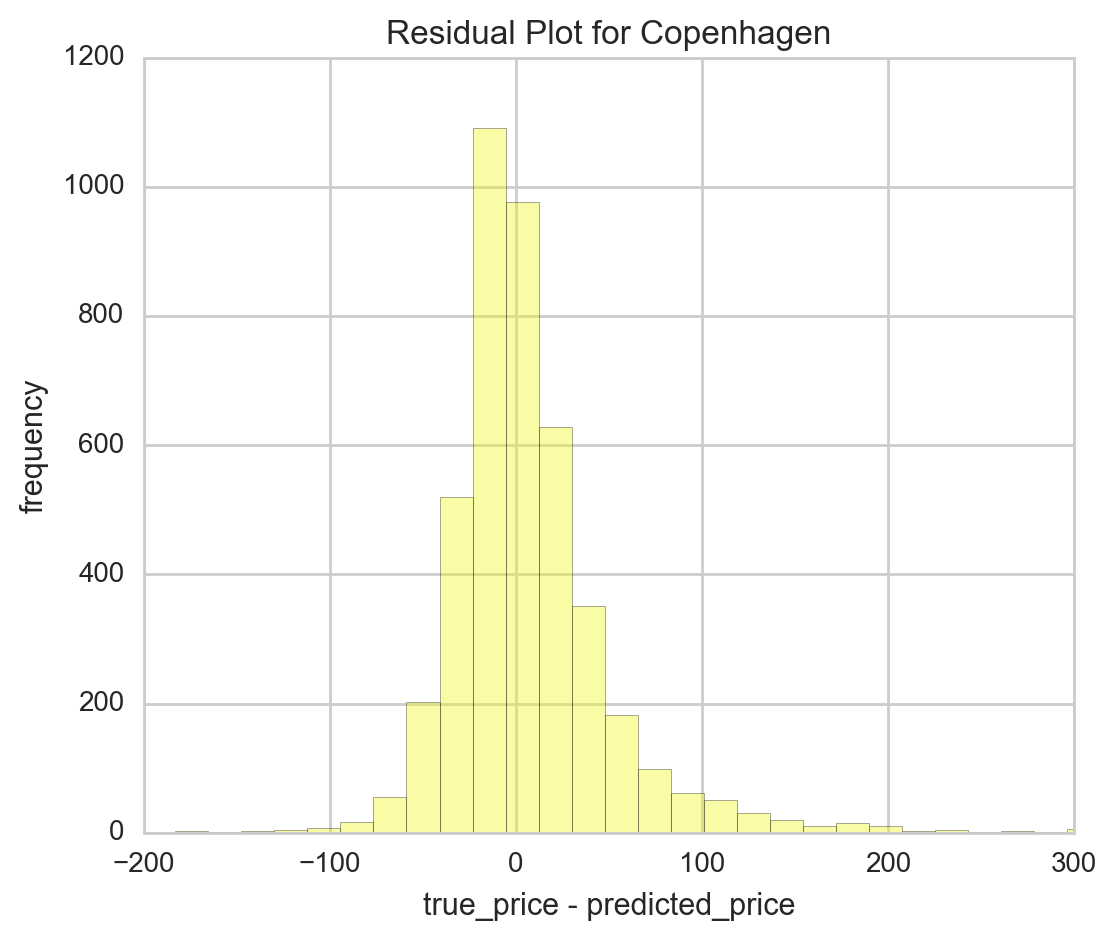

In [40]:
fig, ax = plt.subplots(figsize=(6,5))

sns.distplot(residuals, color = "#f2f81e", kde=False)

ax.set_xlabel("true_price - predicted_price")
ax.set_xlim([-200,300])

ax.set_ylabel("frequency")
#ax.set_ylim([0,200])


ax.set_title("Residual Plot for Copenhagen")

plt.show()

In [41]:
y_pred_enet_all = enet_cop.fit(Xn_train, y_train).predict(Xn)


In [42]:
residuals_all = np.exp(y) - np.exp(y_pred_enet_all)

In [43]:
len(residuals_all)

14541

In [44]:
df['residuals'] = residuals_all

In [45]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_id,room_type,residuals
0,1.0,2.0,2.0,0.051848,1048,55.653094,12.615360,5,2.0,Amager East,5.0,155.0,0,17,7378,3747379,Entire home/apt,44.277916
1,1.0,1.0,1.0,0.051848,1048,55.666940,12.598476,5,3.0,Amager East,5.0,93.0,0,10,7378,9225494,Entire home/apt,4.837805


In [46]:
df = df[df['residuals']<0]

In [47]:
df = df.reset_index(drop=True)

In [48]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_id,room_type,residuals
0,1.0,1.0,1.0,0.051848,1048,55.662366,12.609006,5,3.0,Amager East,2.0,85.0,0,1,7378,6031051,Entire home/apt,-2.325442
1,1.0,2.0,2.0,0.051848,1048,55.663204,12.614227,5,3.0,Amager East,2.0,84.0,0,0,7378,10916436,Entire home/apt,-23.500548


In [49]:
#df.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Copenhagen_dfwithres.csv')